In [7]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, fig, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
def loss_plot(model_name):
    score = model_name.evaluate(x_test, y_test, verbose=0) 
    print('Test score:', score[0]) 
    print('Test accuracy:', score[1])

    fig, ax = plt.subplots(1,1, figsize=(10,6))
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    ax.set_title('Variation of Loss with epochs')

    # list of epoch numbers
    x = list(range(1,epochs+1))

    # print(history.history.keys())
    # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
    # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

    # we will get val_loss and val_acc only when you pass the paramter validation_data
    # val_loss : validation loss
    # val_acc : validation accuracy

    # loss : training loss
    # acc : train accuracy
    # for each key in histrory.histrory we will have a list of length equal to number of epochs


    vy = history.history['val_loss']
    ty = history.history['loss']
    plt_dynamic(x, vy, ty, fig, ax)

In [0]:
def weight_plot(model_name):
    w_after = model_name.get_weights()

    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)

    fig = plt.figure(figsize=(15,7))
    fig.suptitle("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')

    plt.subplot(1, 3, 2)
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')

    plt.subplot(1, 3, 3)
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

## Architecture 1: 
no. of Layers = 3; Kernel_size = 3x3

In [16]:
model1 = Sequential()
#Layer 1
model1.add(Conv2D(48, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#Layer 2
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

#Layer 3
model1.add(Conv2D(50, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))
print(model1.summary())

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 48)        480       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        27712     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 50)        28850     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 50)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 5, 50)         

Test score: 0.02070148353522236
Test accuracy: 0.9935


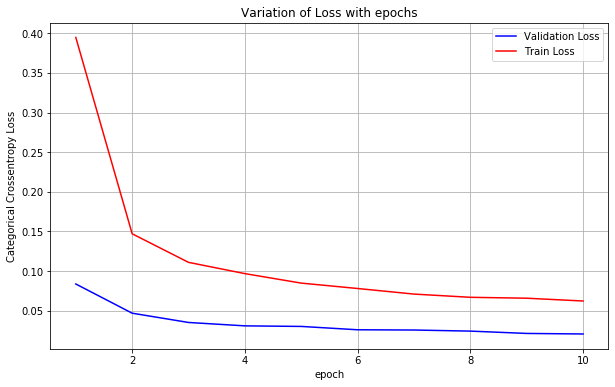

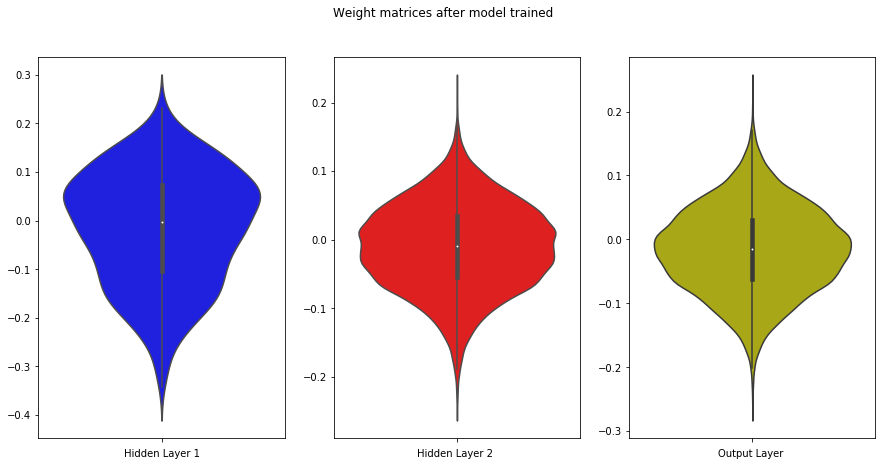

In [17]:
loss_plot(model1)
weight_plot(model1)

## Architecture 2: 
no. of Layers = 5; Kernel_size = 5x5

In [36]:
model2 = Sequential()
#Layer 1
model2.add(Conv2D(50, kernel_size=(5, 5), padding='same',
                 activation='relu',
                 input_shape=input_shape))

#Layer 2
model2.add(Conv2D(50, (5, 5), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

#Layer 3
model2.add(Conv2D(60, (5, 5), padding='same', activation='relu'))
model2.add(Dropout(0.5))

#Layer 4
model2.add(Conv2D(40, (5, 5), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model2.add(Dropout(0.5))

#Layer 5
model2.add(Conv2D(30, (5, 5), padding='same', activation='relu'))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

print(model2.summary())

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 28, 28, 50)        1300      
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 28, 28, 50)        62550     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 14, 14, 60)        75060     
_________________________________________________________________
dropout_71 (Dropout)         (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 14, 14, 40)      

Test score: 0.019397488478862943
Test accuracy: 0.994


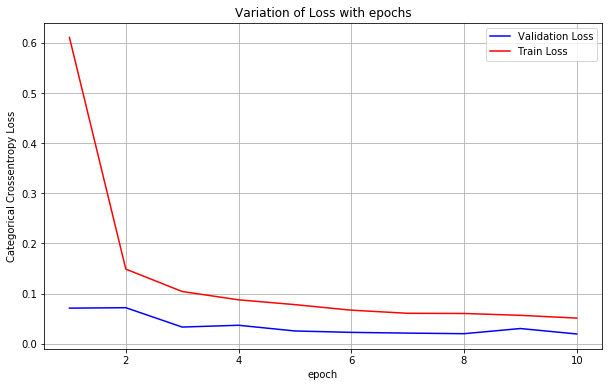

In [37]:
loss_plot(model2)

## Architecture 3: 
no. of Layers = 7; Kernel_size = 6x6

along with Batch Normalization and Dropout layers

In [34]:
from keras.layers.normalization import BatchNormalization

model3 = Sequential()
#Layer 1
model3.add(Conv2D(70, kernel_size=(6, 6), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model3.add(BatchNormalization())

#Layer 2
model3.add(Conv2D(80, (6, 6), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model3.add(Dropout(0.5))

#Layer 3
model3.add(Conv2D(60, (6, 6), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

#Layer 4
model3.add(Conv2D(50, (6, 6), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model3.add(Dropout(0.5))

#Layer 5
model3.add(Conv2D(48, (6, 6), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

#Layer 6
model3.add(Conv2D(36, (6, 6), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

#Layer 7
model3.add(Conv2D(24, (6, 6), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

print(model3.summary())

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 28, 28, 70)        2590      
_________________________________________________________________
batch_normalization_49 (Batc (None, 28, 28, 70)        280       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 28, 28, 80)        201680    
_________________________________________________________________
batch_normalization_50 (Batc (None, 28, 28, 80)        320       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 80)        0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 14, 14, 60)      

Test score: 0.02765477129972496
Test accuracy: 0.9945


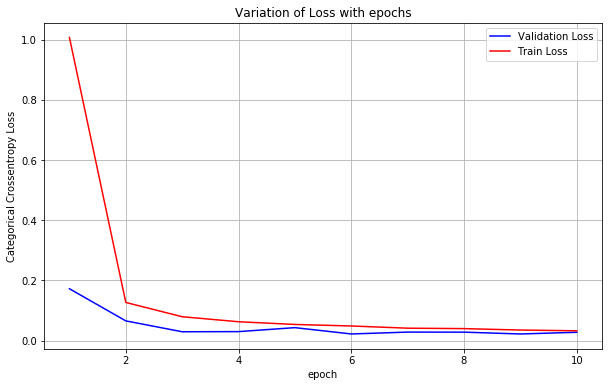

In [35]:
loss_plot(model3)

## Summary

In [44]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable() 
print('\nResults : CNN on MNIST data')
print(40*'=')

x.field_names = ["Hidden layers", "Kernel size", "Padding", "Max pooling", "epochs", "Train error", "Train accuracey", "Test error", "Test accuracy"]
x.add_row([3, '3X3', 'valid', '(2,2)', 10, 0.0623, '98.18 %', 0.0207, '99.35 %'])
x.add_row([5, '5X5', 'same', '(2,2)', 10, 0.0511, '98.60 %', 0.0194, '99.40 %'])
x.add_row([7, '6X6', 'same', '(2,2)', 10, 0.0326, '99.14 %', 0.0277, '99.45 %'])

print(x)


Results : CNN on MNIST data
+---------------+-------------+---------+-------------+--------+-------------+-----------------+------------+---------------+
| Hidden layers | Kernel size | Padding | Max pooling | epochs | Train error | Train accuracey | Test error | Test accuracy |
+---------------+-------------+---------+-------------+--------+-------------+-----------------+------------+---------------+
|       3       |     3X3     |  valid  |    (2,2)    |   10   |    0.0623   |     98.18 %     |   0.0207   |    99.35 %    |
|       5       |     5X5     |   same  |    (2,2)    |   10   |    0.0511   |     98.60 %     |   0.0194   |    99.40 %    |
|       7       |     6X6     |   same  |    (2,2)    |   10   |    0.0326   |     99.14 %     |   0.0277   |    99.45 %    |
+---------------+-------------+---------+-------------+--------+-------------+-----------------+------------+---------------+
